In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chicago-crime-dataset-2024-2026/chicago crimes.csv


In [2]:
df = pd.read_csv('/kaggle/input/chicago-crime-dataset-2024-2026/chicago crimes.csv')
df.head()

/tmp/ipykernel_55/1660094560.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/chicago-crime-dataset-2024-2026/chicago crimes.csv')


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13311263,JG503434,07/29/2022 03:39:00 AM,023XX S TROY ST,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE,True,False,...,25.0,30.0,17,NaN,NaN,2022,04/18/2024 03:40:59 PM,NaN,NaN,NaN
1,13053066,JG103252,01/03/2023 04:44:00 PM,039XX W WASHINGTON BLVD,2017,NARCOTICS,MANUFACTURE / DELIVER - CRACK,SIDEWALK,True,False,...,28.0,26.0,18,NaN,NaN,2023,01/20/2024 03:41:12 PM,NaN,NaN,NaN
2,12131221,JD327000,08/10/2020 09:45:00 AM,015XX N DAMEN AVE,0326,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,STREET,True,False,...,1.0,24.0,03,1162795.0,1909900.0,2020,05/17/2025 03:40:52 PM,41.908418,-87.677407,"(41.908417822, -87.67740693)"
3,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,42.0,32.0,14,1174694.0,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)"


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


In [5]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,8.500901e+06,8.500901e+06,8.500854e+06,7.886083e+06,7.887216e+06,8.406230e+06,8.406230e+06,8.500901e+06,8.406230e+06,8.406230e+06
mean,7.575906e+06,1.183172e+03,1.129534e+01,2.278687e+01,3.737062e+01,1.164666e+06,1.885922e+06,2.011136e+03,4.184257e+01,-8.767125e+01
std,3.815487e+06,7.037766e+02,6.964646e+00,1.385928e+01,2.154677e+01,1.694608e+04,3.242169e+04,7.171506e+00,8.920261e-02,6.141252e-02
min,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,4.102599e+06,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.153089e+06,1.859216e+06,2.005000e+03,4.176898e+01,-8.771327e+01
50%,7.574519e+06,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166221e+06,1.891026e+06,2.010000e+03,4.185666e+01,-8.766550e+01
75%,1.099747e+07,1.731000e+03,1.700000e+01,3.400000e+01,5.600000e+01,1.176405e+06,1.909408e+06,2.017000e+03,4.190709e+01,-8.762807e+01
max,1.411892e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.026000e+03,4.202291e+01,-8.752453e+01


In [6]:
df.shape

(8500901, 22)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500901 entries, 0 to 8500900
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [4]:
df.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     15626
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614818
Community Area          613685
FBI Code                     0
X Coordinate             94671
Y Coordinate             94671
Year                         0
Updated On                   0
Latitude                 94671
Longitude                94671
Location                 94671
dtype: int64

In [12]:
print(df["Arrest"].value_counts())
print(df["Arrest"].value_counts(normalize=True))

Arrest
0    6363292
1    2137562
Name: count, dtype: int64
Arrest
0    0.748547
1    0.251453
Name: proportion, dtype: float64


In [7]:
#change to int type
df["Arrest"] = df["Arrest"].astype(int)

In [9]:
#date processing
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Hour"] = df["Date"].dt.hour
df["DayOfWeek"] = df["Date"].dt.dayofweek


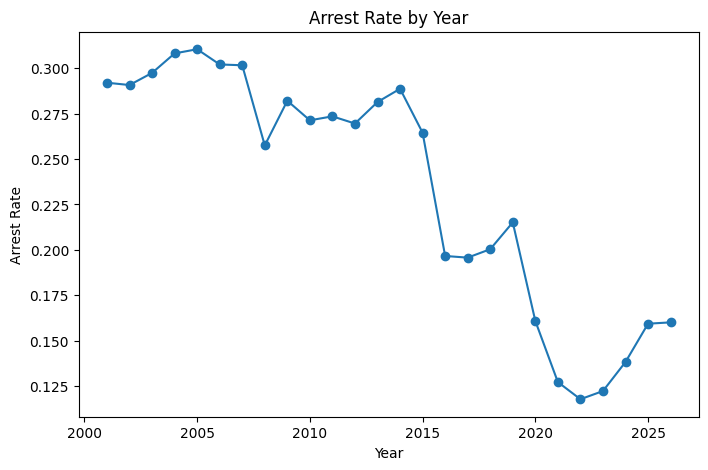

In [15]:
arrest_by_year = df.groupby("Year")["Arrest"].mean()

plt.figure(figsize=(8,5))
arrest_by_year.plot(marker="o")
plt.title("Arrest Rate by Year")
plt.ylabel("Arrest Rate")
plt.show()

A structural shift in arrest rates is observed after 2016, with a sharp decline around 2020–2022, potentially reflecting pandemic-related changes in policing and criminal activity patterns.

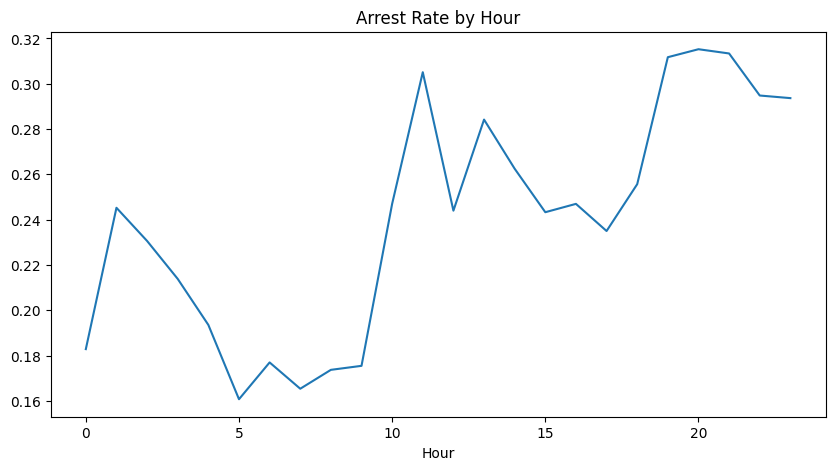

In [16]:
df["Hour"] = df["Date"].dt.hour

hour_arrest = df.groupby("Hour")["Arrest"].mean()

plt.figure(figsize=(10,5))
hour_arrest.plot()
plt.title("Arrest Rate by Hour")
plt.show()

Arrest probability exhibits clear temporal variation, with peaks during late evening hours, suggesting time-dependent policing intensity or crime-type composition effects.

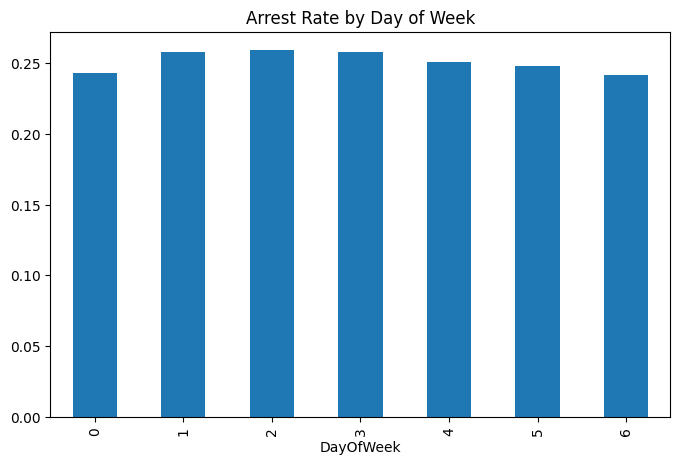

In [17]:
df["DayOfWeek"] = df["Date"].dt.dayofweek

dow_arrest = df.groupby("DayOfWeek")["Arrest"].mean()

plt.figure(figsize=(8,5))
dow_arrest.plot(kind="bar")
plt.title("Arrest Rate by Day of Week")
plt.show()

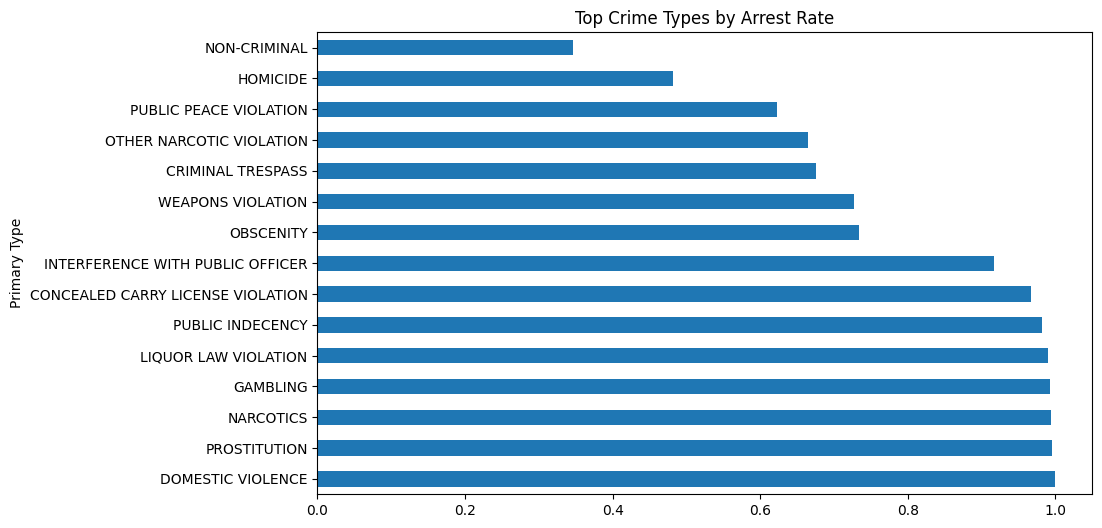

In [19]:
# Top Crime Types by Arrest Rate
type_arrest = (
    df.groupby("Primary Type")["Arrest"]
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(10,6))
type_arrest.plot(kind="barh")
plt.title("Top Crime Types by Arrest Rate")
plt.show()

Certain crime categories (e.g., Narcotics, Domestic Violence) exhibit near-deterministic arrest outcomes, which may introduce strong predictive signals but also reflect structural policing patterns.

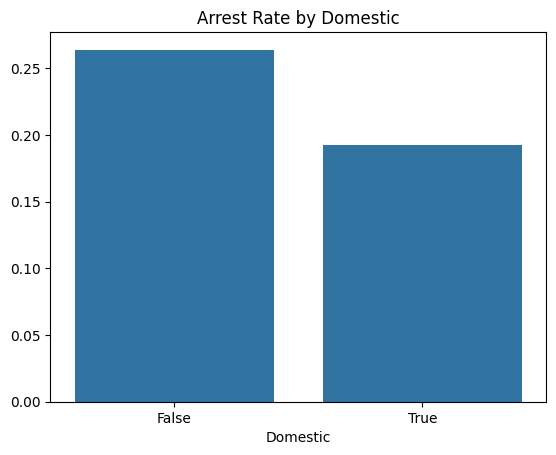

In [20]:
# Arrest Rate by Domestic
domestic_arrest = df.groupby("Domestic")["Arrest"].mean()

sns.barplot(x=domestic_arrest.index, y=domestic_arrest.values)
plt.title("Arrest Rate by Domestic")
plt.show()

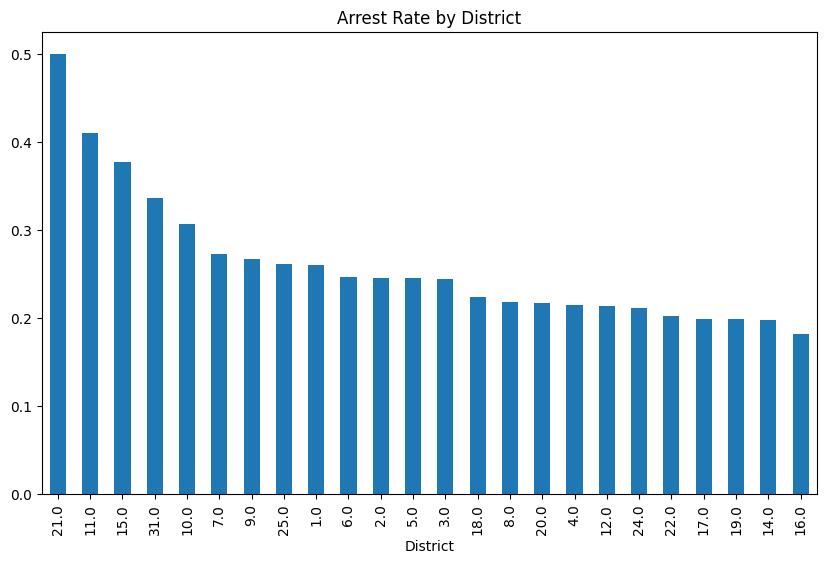

In [21]:
#Arrest Rate by District
district_arrest = (
    df.groupby("District")["Arrest"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
district_arrest.plot(kind="bar")
plt.title("Arrest Rate by District")
plt.show()

In [10]:
#removing columns
drop_cols = ["ID", "Case Number", "Updated On", "Ward", "Community Area", "X Coordinate", "Y corrdinate", "Location", "Latitude", "Longtitude"]

df = df.drop(columns=[col for col in drop_cols if col in df.columns])

In [11]:
df["Location Description"] = df["Location Description"].fillna("Unkown")

df = df.dropna(subset=["District"])

In [22]:
df["IsNight"] = ((df["Hour"] >= 19) | (df["Hour"] <= 5)).astype(int)

df["CrimeSeverity"] = df["Primary Type"].isin([
    "HOMICIDE", "WEAPONS VIOLATION"
]).astype(int)

Columns with excessive missing values (Ward, Community Area) were removed to prevent significant data loss.
Geographical coordinates were retained due to predictive value, and rows with missing coordinates were removed as the proportion was small.

Q: Can we predict whether an arrest will be made historical crime records?
Target: Arrest

To ensure temporal relevance and reduce concept drift, the analysis focuses on the most recent 10 years of data.


In [23]:
# checking recent year
print(df["Year"].min(), df["Year"].max())

# set 10 year
max_year = df["Year"].max()
start_year = max_year - 9

df_recent = df[df["Year"] >= start_year].copy()

print("Filtered shape:", df_recent.shape)
print("Years included:", df_recent["Year"].min(), "to", df_recent["Year"].max())

2001 2026
Filtered shape: (2246165, 19)
Years included: 2017 to 2026


In [24]:
df_recent = df_recent.sort_values("Date")

split_year = df_recent["Year"].max()-1

train = df_recent[df_recent["Year"] < split_year]
test = df_recent[df_recent["Year"] >= split_year]

X_train = train.drop("Arrest", axis = 1)
y_train = train["Arrest"]

X_test = test.drop("Arrest", axis = 1)
y_test = test["Arrest"]

print("Train size: ", X_train.shape)
print("Test size: ", X_test.shape)

print("Train arrest rate:", y_train.mean())
print("Test arrest rate:", y_test.mean())

Train size:  (1984735, 18)
Test size:  (261430, 18)
Train arrest rate: 0.16122253096761027
Test arrest rate: 0.15936579581532342


The arrest rate remains consistent between training and test sets despite temporal splitting, suggesting stable target distribution in the recent decade.


In [31]:
categorical_cols = [
    "Primary Type",
    "Location Description",
    "District"
]

numeric_cols = [
    "Hour",
    "DayOfWeek",
    "Domestic"
]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)

log_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])


In [32]:
# Fit
log_model.fit(X_train, y_train)

# Predict
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc_auc)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



ROC-AUC: 0.836266552292396

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94    219767
           1       0.81      0.37      0.50     41663

    accuracy                           0.89    261430
   macro avg       0.85      0.68      0.72    261430
weighted avg       0.88      0.89      0.87    261430



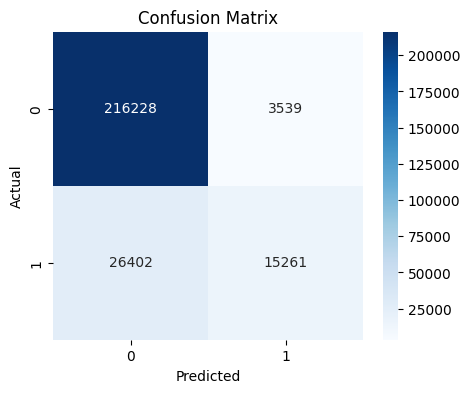

In [33]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [34]:
#Thredhold tuning
threshold = 0.3  # 실험해보기
y_pred_custom = (y_prob >= threshold).astype(int)

print("Threshold:", threshold)
print(classification_report(y_test, y_pred_custom))

Threshold: 0.3
              precision    recall  f1-score   support

           0       0.90      0.95      0.93    219767
           1       0.64      0.44      0.52     41663

    accuracy                           0.87    261430
   macro avg       0.77      0.70      0.72    261430
weighted avg       0.86      0.87      0.86    261430



In [35]:
# getting Feature names 
feature_names = (
    log_model.named_steps["preprocessor"]
    .get_feature_names_out()
)

coefficients = log_model.named_steps["model"].coef_[0]

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values("Coefficient", ascending=False)

coef_df.head(15)

,Feature,Coefficient
24,cat__Primary Type_PROSTITUTION,5.571095
18,cat__Primary Type_NARCOTICS,5.436550
16,cat__Primary Type_LIQUOR LAW VIOLATION,4.597760
4,cat__Primary Type_CONCEALED CARRY LICENSE VIOL...,3.981189
10,cat__Primary Type_GAMBLING,3.632380
13,cat__Primary Type_INTERFERENCE WITH PUBLIC OFF...,3.045643
20,cat__Primary Type_OBSCENITY,2.055665
110,cat__Location Description_DEPARTMENT STORE,1.990027
129,cat__Location Description_GROCERY FOOD STORE,1.800429
141,cat__Location Description_JAIL / LOCK-UP FACILITY,1.555043


## Advanced Model – XGBoost

To capture non-linear interactions between crime type, location, and time features, we trained an XGBoost classifier.
Given class imbalance (~16% arrest rate), we tuned `scale_pos_weight` to upweight the positive class.

We evaluate using ROC-AUC as the primary metric and additionally inspect the confusion matrix and classification report.

In [36]:
# Preprocess
categorical_cols = ["Primary Type", "Location Description", "District"]
numeric_cols = ["Hour", "DayOfWeek", "Domestic"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols),
    ],
    remainder="drop"
)

In [37]:
# Handle class imbalance
#    scale_pos_weight = (#neg / #pos)
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale_pos_weight = neg / pos
print("scale_pos_weight:", scale_pos_weight)

scale_pos_weight: 5.202607005350267


In [38]:
# XGBoost model (reasonable defaults)
xgb_clf = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    min_child_weight=1,
    gamma=0.0,
    scale_pos_weight=scale_pos_weight,
    objective="binary:logistic",
    eval_metric="auc",
    tree_method="hist",      # fast + good for large data
    random_state=42,
    n_jobs=-1
)

xgb_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", xgb_clf)
])

In [39]:
xgb_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Primary Type',
                                                   'Location Description',
                                                   'District']),
                                                 ('num', 'passthrough',
                                                  ['Hour', 'DayOfWeek',
                                                   'Domestic'])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8,...
                               feature_types=None, feature_weights=None,
                               gamma=0.0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=500, n_jobs=-1,
                               num_parallel_tree=None, ...))])

In [40]:
y_pred = (y_prob >= 0.5).astype(int)

roc_auc = roc_auc_score(y_test, y_prob)
print("XGBoost ROC-AUC:", roc_auc)

print("\nClassification Report (threshold=0.5):")
print(classification_report(y_test, y_pred))

XGBoost ROC-AUC: 0.836266552292396

Classification Report (threshold=0.5):
              precision    recall  f1-score   support

           0       0.89      0.98      0.94    219767
           1       0.81      0.37      0.50     41663

    accuracy                           0.89    261430
   macro avg       0.85      0.68      0.72    261430
weighted avg       0.88      0.89      0.87    261430



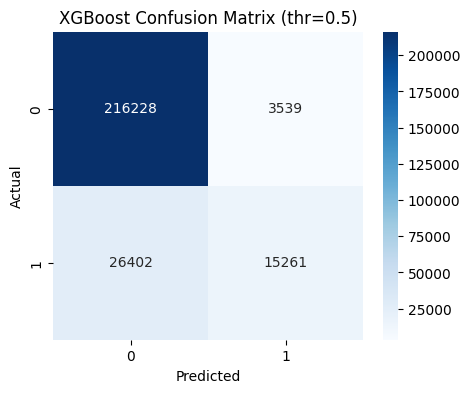

In [41]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost Confusion Matrix (thr=0.5)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Conclusion

### Key Findings (EDA)
- Arrest rate shows clear temporal patterns, with higher rates in the morning and evening.
- Arrest rate decreased notably around 2020–2022 and then showed signs of recovery afterward.
- Arrest probability varies significantly by crime type and location-related features.

### Modeling Summary
- Problem type: Supervised Binary Classification (Target = Arrest).
- Data split: Time-based split on the most recent 10 years to reflect real-world deployment.
- Evaluation: ROC-AUC as the primary metric due to class imbalance (~16% arrest rate).

### Results
- Logistic Regression achieved strong baseline performance (ROC-AUC ≈ 0.836), indicating that time + crime-type + location features provide strong predictive signals.
- XGBoost was trained to capture non-linear interactions and (optionally) address imbalance via `scale_pos_weight`.
  (Insert your final XGBoost ROC-AUC here.)

### Limitations / Risks
- Arrest outcomes can reflect policing practices and structural bias, not only crime severity.
- Concept drift is possible (e.g., post-2020 changes), implying the need for periodic retraining and monitoring in a real deployment.

### Next Steps (Optional)
- Add model interpretability (SHAP) to explain feature contributions.
- Perform threshold tuning to align precision/recall with an application-specific objective.
- Add temporal cross-validation (rolling window) to validate stability over time.

In [44]:
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score

# Logistic 
log_y_prob = log_model.predict_proba(X_test)[:, 1]
log_y_pred = (log_y_prob >= 0.5).astype(int)

log_auc = roc_auc_score(y_test, log_y_prob)
log_ap = average_precision_score(y_test, log_y_prob)
log_f1 = f1_score(y_test, log_y_pred)

# XGBoost 
xgb_y_prob = xgb_model.predict_proba(X_test)[:, 1]
xgb_y_pred = (xgb_y_prob >= 0.5).astype(int)

xgb_auc = roc_auc_score(y_test, xgb_y_prob)
xgb_ap = average_precision_score(y_test, xgb_y_prob)
xgb_f1 = f1_score(y_test, xgb_y_pred)

comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "XGBoost"],
    "ROC-AUC": [log_auc, xgb_auc],
    "PR-AUC (Avg Precision)": [log_ap, xgb_ap],
    "F1-score (thr=0.5)": [log_f1, xgb_f1]
})

comparison_df

,Model,ROC-AUC,PR-AUC (Avg Precision),F1-score (thr=0.5)
0,Logistic Regression,0.836267,0.605725,0.504805
1,XGBoost,0.863022,0.653724,0.521520
